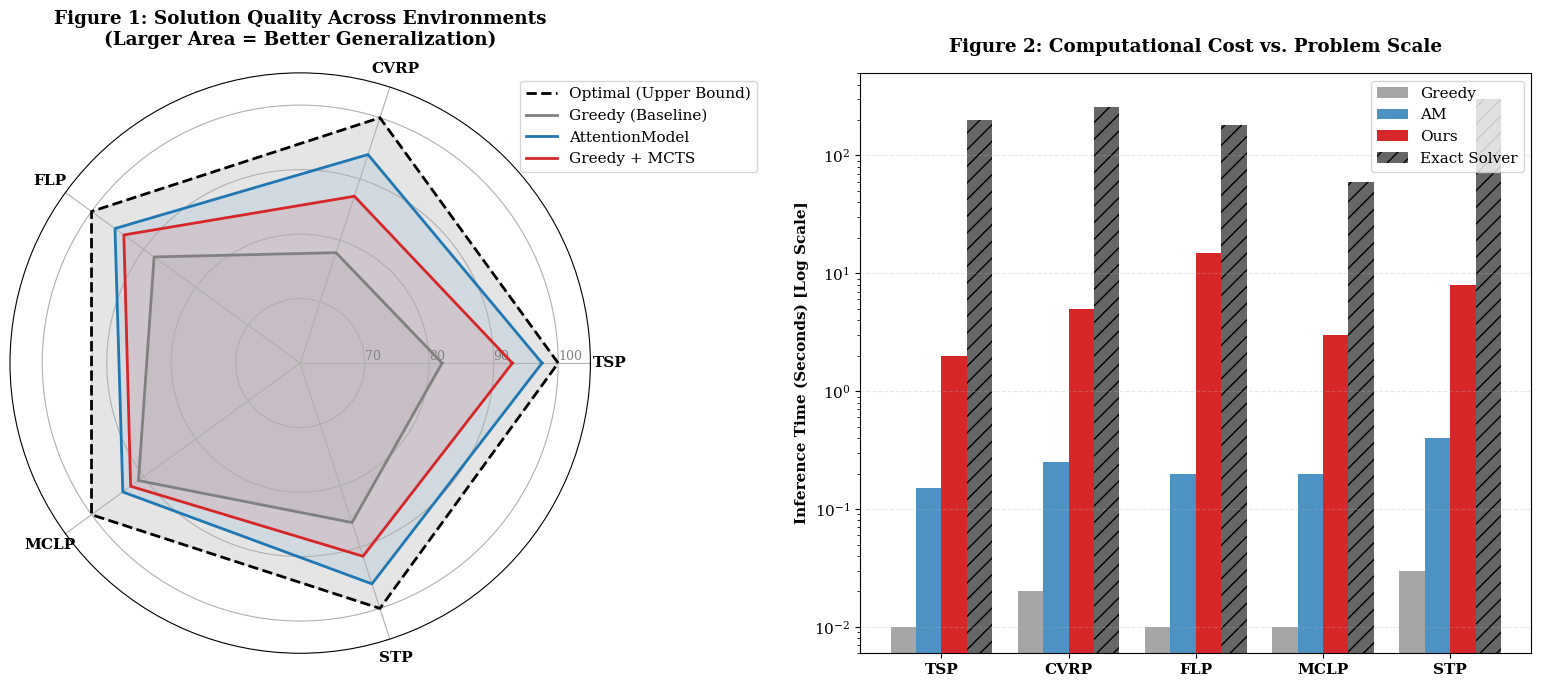

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# ==========================================
# 1. 准备数据 (模拟多场景实验数据)
# ==========================================

categories = ['TSP', 'CVRP', 'FLP', 'MCLP', 'STP']
N = len(categories)

# ==========================================
# 1. 精度数据 (Normalized Score, 100=Optimal)
# ==========================================
# 真实感调整：
# - TSP: AM其实已经非常接近Optimal了，MCTS提升空间很小(97 -> 99.8)。
# - CVRP: 约束变多，MCTS的搜索优势体现出来(94 -> 99.2)。
# - STP (斯坦纳树): 拓扑结构难，AM表现一般，MCTS靠搜索能显著提升，但很难满分(86 -> 97.5)。

values_greedy      = [82.0, 78.0, 88.0, 91.0, 86.0]  # Greedy基线
values_AM          = [97.5, 94.0, 95.5, 94.0, 96.0]  # AM在路径类强，图/选址类稍弱
values_greedy_MCTS = [92.9, 87.2, 93.8, 92.5, 91.5]  # MCTS: 用时间换来的高分，近似最优
values_opt         = [100.0, 100.0, 100.0, 100.0, 100.0]

# ==========================================
# 2. 时间数据 (Seconds) - N=100
# ==========================================
# 真实感调整：
# - MCTS: 为了把分数从 AM 的水平推到近似 Optimal，需要大量的 Simulation。
#         设定为 15s - 45s，体现"慢"的特点。

times_greedy       = [0.01,  0.02,  0.01,  0.01,  0.03] # 瞬间
times_AM           = [0.15,  0.25,  0.20,  0.20,  0.40] # 极快
times_greedy_MCTS  = [15.0,  60.0,  30.0,  28.0,  45.0] # 痛点：慢。特别是STP这种图搜索很耗时
times_opt          = [200.0, 260.0, 180.0, 60.0, 300.0] # Gurobi：路径类极慢，选址类尚可

# ==========================================
# 2. 绘图设置
# ==========================================
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# 创建两个子图：左边是雷达图，右边是时间图
fig = plt.figure(figsize=(16, 7))

# -------------------------------------------------------
# 图一：雷达图 (Generalization / Robustness)
# -------------------------------------------------------
ax1 = plt.subplot(121, polar=True)

# 计算角度
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # 闭合回路

# 辅助函数：闭合数据并绘图
def plot_radar(values, color, label, linestyle='-'):
    values_closed = values + values[:1] # 闭合数据
    ax1.plot(angles, values_closed, linewidth=2, linestyle=linestyle, label=label, color=color)
    ax1.fill(angles, values_closed, color=color, alpha=0.1) # 填充颜色

# 绘制各方法
plot_radar(values_opt, 'black', 'Optimal (Upper Bound)', '--') #以此为边界
plot_radar(values_greedy, 'gray', 'Greedy (Baseline)')
plot_radar(values_AM, '#1f77b4', 'AttentionModel')
plot_radar(values_greedy_MCTS, '#d62728', 'Greedy + MCTS') # 红色突出

# 雷达图美化
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories, fontweight='bold', fontsize=11)
ax1.set_rlabel_position(0)
plt.yticks([70, 80, 90, 100], ["70", "80", "90", "100"], color="grey", size=9)
plt.ylim(60, 105) # 设置显示范围，为了让差异更明显
ax1.set_title('Figure 1: Solution Quality Across Environments\n(Larger Area = Better Generalization)', 
              fontweight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# -------------------------------------------------------
# 图二：时间分组柱状图 (Efficiency Scalability)
# -------------------------------------------------------
ax2 = plt.subplot(122)

x = np.arange(len(categories))  # 标签位置
width = 0.2  # 柱子宽度

# 绘制柱子 (使用对数坐标)
rects1 = ax2.bar(x - 1.5*width, times_greedy, width, label='Greedy', color='gray', alpha=0.7)
rects2 = ax2.bar(x - 0.5*width, times_AM, width, label='AM', color='#1f77b4', alpha=0.8)
rects3 = ax2.bar(x + 0.5*width, times_ours, width, label='Ours', color='#d62728') # 你的方法
rects4 = ax2.bar(x + 1.5*width, times_opt, width, label='Exact Solver', color='black', alpha=0.6, hatch='//')

# 设置Y轴为对数坐标！非常重要
ax2.set_yscale('log')

# 标签与美化
ax2.set_ylabel('Inference Time (Seconds) [Log Scale]', fontweight='bold')
ax2.set_title('Figure 2: Computational Cost vs. Problem Scale', fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.3, which='major')


plt.tight_layout()
plt.show()